<a href="https://colab.research.google.com/github/hnuwong/ASL_study_2021/blob/main/GitHub_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제 1. Fashion MNIST 데이터를 이용하여 손글씨를 식별하는 DNN 구축하기

## Fashion MNIST sample 그려보기.
- 각 class별로 한 개씩의 sample을 뽑아서 그림을 그려봅니다.

## DNN을 이용한 분류모형 학습 (dropout의 효과 이해하기.).
- Fasion MNIST data를 분류하는 DNN 모형을 학습합니다.
- Dropout의 효과를 이해하는 것이 목표입니다.
- Dropout을 사용할 때와 사용하지 않을 때의 test accuracy를 비교해봅니다.


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model

print(tf.__version__)

2.6.0


In [ ]:
fashion_mnist = datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_x = train_x/255.0
test_x = test_x/255.0

import numpy as np

## train, valid set split
np.random.seed(1234)
valid_ind = np.random.choice(np.arange(train_x.shape[0]), 10000, replace=False)
rest_ind = np.setdiff1d(np.arange(train_x.shape[0]), valid_ind)

n_train = 500

train_ind = np.random.choice(rest_ind, n_train, replace=False)

valid_x, valid_y = train_x[valid_ind], train_y[valid_ind]
train_x, train_y = train_x[train_ind], train_y[train_ind]

print(train_x.shape)
print(valid_x.shape)

4431872/4422102 [==============================] - 0s 0us/step
(500, 28, 28)
(10000, 28, 28)


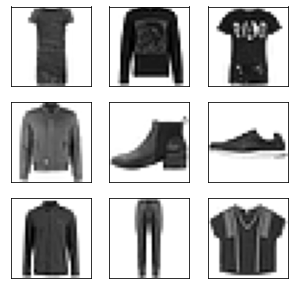

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for coll in range(9):
  plt.subplot(3,3,coll+1)
  plt.imshow(train_x[coll], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
____________________________

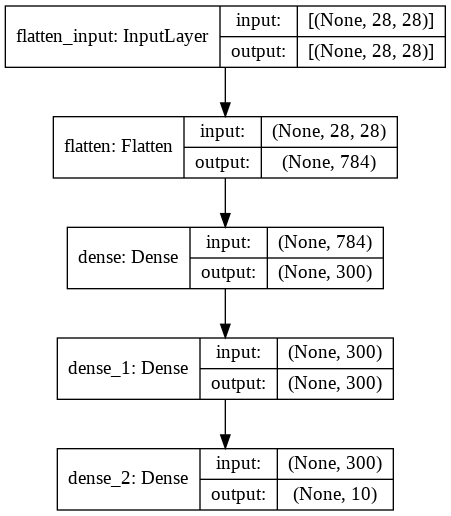

In [ ]:
model = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dense(300, activation='relu'),
  Dense(10, activation='softmax')]
)

model_dr = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dropout(0.7),
  Dense(300, activation='relu'),
  Dropout(0.7),
  Dense(10, activation='softmax')]
)
model.summary()
model_dr.summary()

plot_model(model, to_file='model_fashion_mnist.png', show_shapes=True)
plot_model(model, to_file='model_dr_fashion_mnist.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_dr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist=model.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(valid_x, valid_y))
hist_dr=model_dr.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(valid_x, valid_y))

Epoch 1/100
5/5 [==============================] - 1s 132ms/step - loss: 1.8218 - accuracy: 0.4180 - val_loss: 1.3159 - val_accuracy: 0.6304
Epoch 2/100
5/5 [==============================] - 0s 88ms/step - loss: 1.0523 - accuracy: 0.6600 - val_loss: 0.9568 - val_accuracy: 0.6672
Epoch 3/100
5/5 [==============================] - 0s 92ms/step - loss: 0.7620 - accuracy: 0.7540 - val_loss: 0.8532 - val_accuracy: 0.6731
Epoch 4/100
5/5 [==============================] - 0s 90ms/step - loss: 0.6799 - accuracy: 0.7520 - val_loss: 0.7863 - val_accuracy: 0.7221
Epoch 5/100
5/5 [==============================] - 0s 87ms/step - loss: 0.6358 - accuracy: 0.7860 - val_loss: 0.7401 - val_accuracy: 0.7327
Epoch 6/100
5/5 [==============================] - 0s 91ms/step - loss: 0.5507 - accuracy: 0.8020 - val_loss: 0.7392 - val_accuracy: 0.7306
Epoch 7/100
5/5 [==============================] - 0s 86ms/step - loss: 0.4849 - accuracy: 0.8320 - val_loss: 0.6805 - val_accuracy: 0.7556
Epoch 8/100
5/5 [==

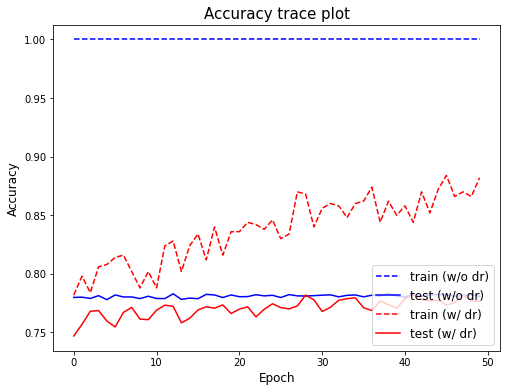

313/313 [==============================] - 1s 3ms/step - loss: 0.7102 - accuracy: 0.7747
Model stats (w/o dropout)
...accuracy: 0.777, loss: 1.086
Model stats (w/ dropout)
...accuracy: 0.775, loss: 0.710


In [ ]:
plt.figure(figsize=(8,6))
plt.plot(hist.history['accuracy'][50:100], 'b--', label='train (w/o dr)')
plt.plot(hist.history['val_accuracy'][50:100], 'b-', label='test (w/o dr)')
plt.plot(hist_dr.history['accuracy'][50:100], 'r--', label='train (w/ dr)')
plt.plot(hist_dr.history['val_accuracy'][50:100], 'r-', label='test (w/ dr)')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

sc = model.evaluate(test_x, test_y)
sc_dr = model_dr.evaluate(test_x, test_y)
print('Model stats (w/o dropout)')
print('...accuracy: %.3f, loss: %.3f'%(sc[1], sc[0]))
print('Model stats (w/ dropout)')
print('...accuracy: %.3f, loss: %.3f'%(sc_dr[1], sc_dr[0]))